In [1]:
!pip install gensim
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install --force-reinstall --no-cache-dir gensim

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have num

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 253.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 252.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 282.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 220.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 255.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfull

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1: Load and split dataset**

In [2]:
import pandas as pd

# Load the train and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/DAT550/arxiv_train.csv.gz", compression='gzip')
test_df = pd.read_csv("/content/drive/MyDrive/DAT550/arxiv_test.csv.gz", compression='gzip')

# Display a sample
print(train_df.head())

# Check class distribution in the train dataset
train_df['label'].value_counts()

   Unnamed: 0                                           abstract     label
0       31716    Automatic meeting analysis is an essential f...      eess
1       89533    We propose a protocol to encode classical bi...  quant-ph
2       82700    A number of physically intuitive results for...  quant-ph
3       78830    In the last decade rare-earth hexaborides ha...   physics
4       94948    We introduce the weak barycenter of a family...      stat


,count
label,
stat,8055
eess,8052
physics,8023
hep-ph,8010
cs,8005
quant-ph,7987
astro-ph,7987
hep-th,7981
math,7958


**Step 2: MLP + TF-IDF**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Stratified split
train_set, dev_set = train_test_split(
    train_df,
    test_size=0.2,
    random_state=42,
    stratify=train_df['label']  # to preserve label proportions
)

# Check sizes
print(f"Training set size: {len(train_set)}")
print(f"Development set size: {len(dev_set)}")

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=20000)  # limit vocab size for performance

# Fit on train_set abstracts and transform train/dev
X_train = vectorizer.fit_transform(train_set['abstract'])
X_dev = vectorizer.transform(dev_set['abstract'])

# Encode target labels as integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_set['label'])
y_dev = label_encoder.transform(dev_set['label'])

# Get number of classes
num_classes = len(label_encoder.classes_)

# Define and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=20, random_state=42, verbose=True)
mlp.fit(X_train, y_train)


Training set size: 64000
Development set size: 16000
Iteration 1, loss = 0.96061775
Iteration 2, loss = 0.39260881
Iteration 3, loss = 0.28409469
Iteration 4, loss = 0.21183366
Iteration 5, loss = 0.15874728
Iteration 6, loss = 0.11843726
Iteration 7, loss = 0.08755939
Iteration 8, loss = 0.06476607
Iteration 9, loss = 0.04802430
Iteration 10, loss = 0.03624240
Iteration 11, loss = 0.02830151
Iteration 12, loss = 0.02289140
Iteration 13, loss = 0.01924649
Iteration 14, loss = 0.01672410
Iteration 15, loss = 0.01492071
Iteration 16, loss = 0.01358955
Iteration 17, loss = 0.01255705
Iteration 18, loss = 0.01174714
Iteration 19, loss = 0.01109416
Iteration 20, loss = 0.01052950


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128,), max_iter=20, random_state=42,
              verbose=True)

In [6]:
# Predict on dev set
y_pred = mlp.predict(X_dev)

# Metrics
print("Accuracy on Dev Set:", accuracy_score(y_dev, y_pred))
print("\nClassification Report:\n", classification_report(y_dev, y_pred, target_names=label_encoder.classes_))


Accuracy on Dev Set: 0.8093125

Classification Report:
               precision    recall  f1-score   support

    astro-ph       0.94      0.93      0.93      1597
    cond-mat       0.79      0.77      0.78      1588
          cs       0.66      0.65      0.66      1601
        eess       0.74      0.77      0.76      1610
      hep-ph       0.93      0.92      0.92      1602
      hep-th       0.90      0.91      0.90      1596
        math       0.85      0.83      0.84      1592
     physics       0.66      0.66      0.66      1605
    quant-ph       0.85      0.85      0.85      1598
        stat       0.78      0.80      0.79      1611

    accuracy                           0.81     16000
   macro avg       0.81      0.81      0.81     16000
weighted avg       0.81      0.81      0.81     16000



In [7]:
# Transform the test set abstracts using the same vectorizer fitted on the training data
X_test = vectorizer.transform(test_df['abstract'])

# Encode the test set labels using the same label encoder
y_test = label_encoder.transform(test_df['label'])

# Predict on dev set
y_pred = mlp.predict(X_dev)

# Predict on the test set
y_test_pred = mlp.predict(X_test)

# Dev Metrics
print("Accuracy on Dev Set:", accuracy_score(y_dev, y_pred))
print("\nClassification Report:\n", classification_report(y_dev, y_pred, target_names=label_encoder.classes_))

# Evaluate the model on the test set
print("Accuracy on Test Set:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Accuracy on Dev Set: 0.8093125

Classification Report:
               precision    recall  f1-score   support

    astro-ph       0.94      0.93      0.93      1597
    cond-mat       0.79      0.77      0.78      1588
          cs       0.66      0.65      0.66      1601
        eess       0.74      0.77      0.76      1610
      hep-ph       0.93      0.92      0.92      1602
      hep-th       0.90      0.91      0.90      1596
        math       0.85      0.83      0.84      1592
     physics       0.66      0.66      0.66      1605
    quant-ph       0.85      0.85      0.85      1598
        stat       0.78      0.80      0.79      1611

    accuracy                           0.81     16000
   macro avg       0.81      0.81      0.81     16000
weighted avg       0.81      0.81      0.81     16000

Accuracy on Test Set: 0.80675

Classification Report on Test Set:
               precision    recall  f1-score   support

    astro-ph       0.94      0.93      0.93      2013
    cond-

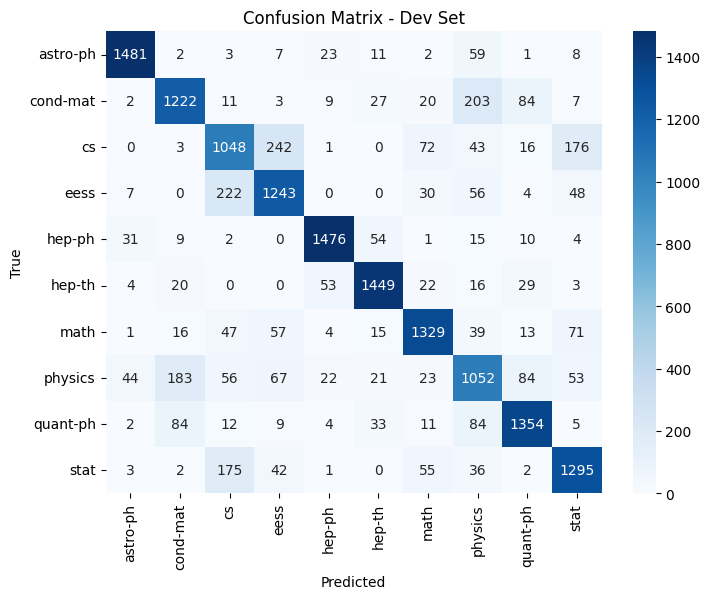

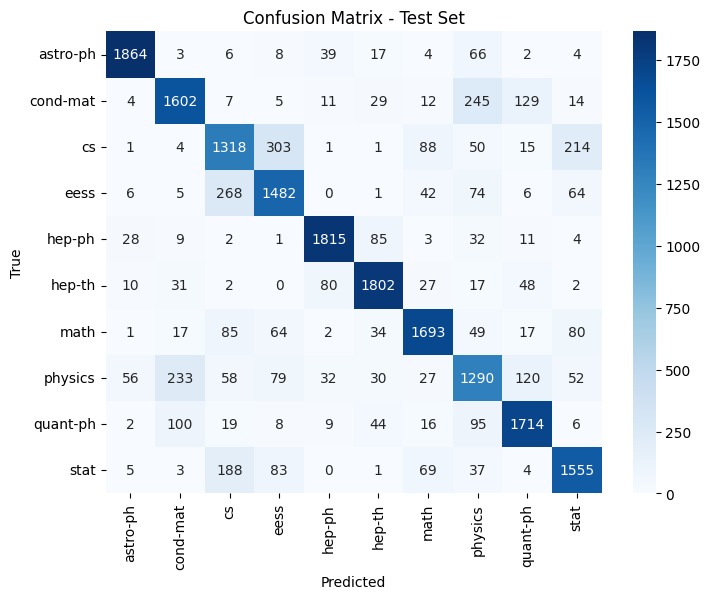

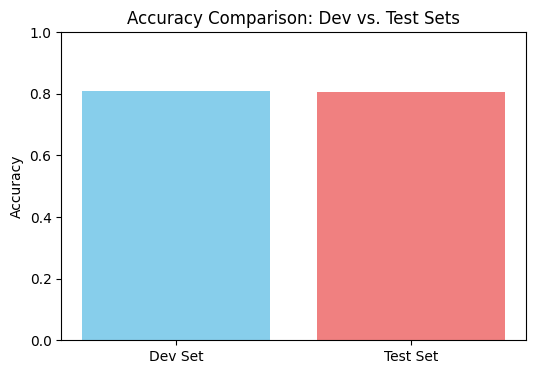

In [30]:
#compare dev and test mlp and make graph

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

# Plot confusion matrix for dev set
plot_confusion_matrix(y_dev, y_pred, "Confusion Matrix - Dev Set")


# Plot confusion matrix for test set
plot_confusion_matrix(y_test, y_test_pred, "Confusion Matrix - Test Set")

# Example of comparing accuracy scores (you can extend this for other metrics)
dev_accuracy = accuracy_score(y_dev, y_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
plt.bar(["Dev Set", "Test Set"], [dev_accuracy, test_accuracy], color=['skyblue', 'lightcoral'])
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Dev vs. Test Sets")
plt.ylim([0, 1]) # Set y-axis limit to be between 0 and 1
plt.show()


**Step 3: Glove + FastText + Word2Vec + Word Embedding**

Aggregation (mean/sum/max) + classifier

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

all_texts = train_set['abstract'].tolist() + dev_set['abstract'].tolist()
maxlen = 300

tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(all_texts)

X_train_seq = tokenizer.texts_to_sequences(train_set['abstract'])
X_dev_seq = tokenizer.texts_to_sequences(dev_set['abstract'])
X_test_seq = tokenizer.texts_to_sequences(test_df['abstract'])


X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_dev_pad = pad_sequences(X_dev_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes)
y_dev_cat = to_categorical(y_dev, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


import numpy as np

embedding_index = {}
with open("/content/drive/MyDrive/DAT550/glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_dim = 100
word_index = tokenizer.word_index

embedding_matrix = np.zeros((20000, embedding_dim))
for word, i in word_index.items():
    if i < 20000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [8]:
from gensim.models import KeyedVectors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Embedding loader
def load_embedding_model(model_type='glove', embedding_dim=100, path=None):
    embedding_index = {}

    if model_type == 'glove':
        with open(path, encoding='utf8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embedding_index[word] = coefs

    elif model_type == 'word2vec':
        w2v_model = KeyedVectors.load_word2vec_format(path, binary=True)
        for word in w2v_model.key_to_index:
            embedding_index[word] = w2v_model[word]

    elif model_type == 'fasttext':
        with open(path, encoding='utf8') as f:
            next(f)  # Skip header
            for line in f:
                values = line.rstrip().split(' ')
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embedding_index[word] = coefs

    return embedding_index


In [9]:
def aggregate_embeddings(texts, embedding_index, embedding_dim, strategy='mean'):
    vectors = []
    for text in tqdm(texts, desc=f'Aggregating ({strategy})'):
        tokens = text.lower().split()
        vecs = [embedding_index[word] for word in tokens if word in embedding_index]

        if not vecs:
            vecs = [np.zeros(embedding_dim)]

        vecs = np.stack(vecs)
        if strategy == 'mean':
            agg = np.mean(vecs, axis=0)
        elif strategy == 'sum':
            agg = np.sum(vecs, axis=0)
        elif strategy == 'max':
            agg = np.max(vecs, axis=0)
        vectors.append(agg)

    return np.array(vectors)


In [10]:
def run_pipeline(model_type, strategy, path, embedding_dim):
    print(f"\n🔁 {model_type.upper()} + {strategy.upper()} pooling")

    embedding_index = load_embedding_model(model_type, embedding_dim, path)

    X_train_agg = aggregate_embeddings(train_set['abstract'], embedding_index, embedding_dim, strategy)
    X_dev_agg = aggregate_embeddings(dev_set['abstract'], embedding_index, embedding_dim, strategy)
    X_test_agg = aggregate_embeddings(test_df['abstract'], embedding_index, embedding_dim, strategy)

    model = Sequential([
        Dense(128, activation='relu', input_shape=(embedding_dim,)),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train_agg, y_train_cat, validation_data=(X_dev_agg, y_dev_cat),
              epochs=5, batch_size=64, verbose=0)

    dev_loss, dev_acc = model.evaluate(X_dev_agg, y_dev_cat, verbose=0)
    test_loss, test_acc = model.evaluate(X_test_agg, y_test_cat, verbose=0)

    print(f"📊 Dev Accuracy: {dev_acc:.4f}, 🧪 Test Accuracy: {test_acc:.4f}")

    return {
        'Embedding': model_type,
        'Strategy': strategy,
        'Dev Accuracy': dev_acc,
        'Test Accuracy': test_acc
    }


In [13]:
embedding_configs = [
    ('glove', 100, '/content/drive/MyDrive/DAT550/glove.6B.100d.txt'),
    ('word2vec', 300, '/content/drive/MyDrive/DAT550/GoogleNews-vectors-negative300.bin.gz'),
    ('fasttext', 300, '/content/drive/MyDrive/DAT550/wiki-news-300d-1M.vec')
]

strategies = ['mean', 'sum', 'max']
results = []

for model_type, dim, path in embedding_configs:
    for strategy in strategies:
        result = run_pipeline(model_type, strategy, path, dim)
        results.append(result)




🔁 GLOVE + MEAN pooling


Aggregating (mean): 100%|██████████| 20000/20000 [00:04<00:00, 4891.26it/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


📊 Dev Accuracy: 0.6786, 🧪 Test Accuracy: 0.6763

🔁 GLOVE + SUM pooling


Aggregating (sum): 100%|██████████| 20000/20000 [00:04<00:00, 4287.30it/s]


📊 Dev Accuracy: 0.6488, 🧪 Test Accuracy: 0.6456

🔁 GLOVE + MAX pooling


Aggregating (max): 100%|██████████| 20000/20000 [00:05<00:00, 3837.19it/s]


📊 Dev Accuracy: 0.5303, 🧪 Test Accuracy: 0.5282

🔁 WORD2VEC + MEAN pooling


Aggregating (mean): 100%|██████████| 20000/20000 [00:04<00:00, 4813.52it/s]


📊 Dev Accuracy: 0.7278, 🧪 Test Accuracy: 0.7255

🔁 WORD2VEC + SUM pooling


Aggregating (sum): 100%|██████████| 20000/20000 [00:04<00:00, 4112.36it/s]


📊 Dev Accuracy: 0.7231, 🧪 Test Accuracy: 0.7189

🔁 WORD2VEC + MAX pooling


Aggregating (max): 100%|██████████| 20000/20000 [00:04<00:00, 4473.84it/s]


📊 Dev Accuracy: 0.6248, 🧪 Test Accuracy: 0.6265

🔁 FASTTEXT + MEAN pooling


Aggregating (mean): 100%|██████████| 20000/20000 [00:06<00:00, 3232.09it/s]


📊 Dev Accuracy: 0.7719, 🧪 Test Accuracy: 0.7702

🔁 FASTTEXT + SUM pooling


Aggregating (sum): 100%|██████████| 20000/20000 [00:05<00:00, 3550.62it/s]


📊 Dev Accuracy: 0.7818, 🧪 Test Accuracy: 0.7811

🔁 FASTTEXT + MAX pooling


Aggregating (max): 100%|██████████| 20000/20000 [00:05<00:00, 3804.45it/s]


📊 Dev Accuracy: 0.7029, 🧪 Test Accuracy: 0.7067



📈 Final Aggregation + Embedding Comparison
  Embedding Strategy  Dev Accuracy  Test Accuracy
0     glove     mean      0.678625        0.67630
1     glove      sum      0.648812        0.64555
2     glove      max      0.530250        0.52820
3  word2vec     mean      0.727813        0.72555
4  word2vec      sum      0.723063        0.71890
5  word2vec      max      0.624750        0.62650
6  fasttext     mean      0.771875        0.77015
7  fasttext      sum      0.781750        0.78115
8  fasttext      max      0.702875        0.70670


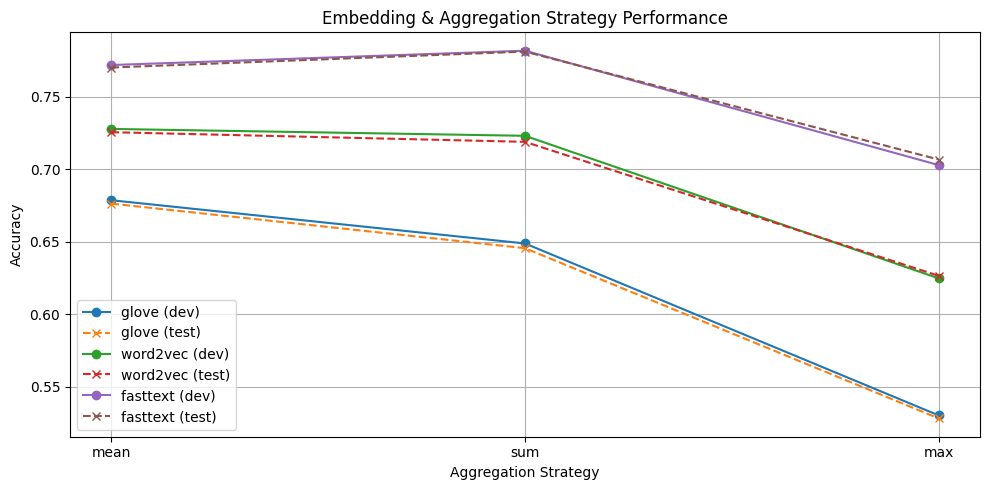

In [14]:
results_df = pd.DataFrame(results)
print("\n📈 Final Aggregation + Embedding Comparison")
print(results_df)

# Plot
plt.figure(figsize=(10, 5))
for emb in results_df['Embedding'].unique():
    subset = results_df[results_df['Embedding'] == emb]
    plt.plot(subset['Strategy'], subset['Dev Accuracy'], marker='o', label=f'{emb} (dev)')
    plt.plot(subset['Strategy'], subset['Test Accuracy'], marker='x', linestyle='--', label=f'{emb} (test)')

plt.title("Embedding & Aggregation Strategy Performance")
plt.xlabel("Aggregation Strategy")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


**RNN-based Embedding and Classification
    * Implement RNNs: Simple RNN, LSTM, GRU
    * Use different output aggregation strategies:
        * Last hidden state
        * Bidirectional (first + last)
        * Mean pooling
        * Max pooling

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional
import pandas as pd

def build_rnn_model(rnn_type='GRU', aggregation='last', maxlen=300, embedding_matrix=None, num_classes=None):
    input_layer = Input(shape=(maxlen,))

    embedding_layer = Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=False
    )(input_layer)

    return_sequences = aggregation != 'last'

    if rnn_type == 'GRU':
        rnn_layer = GRU(128, return_sequences=return_sequences)(embedding_layer)
    elif rnn_type == 'LSTM':
        rnn_layer = LSTM(128, return_sequences=return_sequences)(embedding_layer)
    else:
        rnn_layer = SimpleRNN(128, return_sequences=return_sequences)(embedding_layer)

    if aggregation == 'last':
        aggregated = rnn_layer
    elif aggregation == 'mean':
        aggregated = GlobalAveragePooling1D()(rnn_layer)
    elif aggregation == 'max':
        aggregated = GlobalMaxPooling1D()(rnn_layer)

    dropout = Dropout(0.3)(aggregated)
    output = Dense(num_classes, activation='softmax')(dropout)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Loop through RNN types and aggregation strategies
rnn_types = ['SimpleRNN', 'LSTM', 'GRU']
aggregation_strategies = ['last', 'mean', 'max']
maxlen = 300

results2 = []

for rnn_type in rnn_types:
    for agg in aggregation_strategies:
        print(f"\nTraining {rnn_type} with {agg} aggregation...")
        model = build_rnn_model(
            rnn_type=rnn_type,
            aggregation=agg,
            maxlen=maxlen,
            embedding_matrix=embedding_matrix,
            num_classes=num_classes
        )
        model.fit(
            X_train_pad, y_train_cat,
            validation_data=(X_dev_pad, y_dev_cat),
            epochs=5,
            batch_size=64,
            verbose=0
        )
        test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_cat, verbose=0)
        print(f"Test Accuracy: {test_accuracy:.4f}")
        results2.append({
            'RNN Type': rnn_type,
            'Aggregation': agg,
            'Test Accuracy': test_accuracy
        })

# Show results in a DataFrame
results_df_2 = pd.DataFrame(results2)
print("\nFinal Evaluation Results:")
print(results_df_2)



Training SimpleRNN with last aggregation...
Test Accuracy: 0.1072

Training SimpleRNN with mean aggregation...
Test Accuracy: 0.5102

Training SimpleRNN with max aggregation...
Test Accuracy: 0.7757

Training LSTM with last aggregation...
Test Accuracy: 0.7453

Training LSTM with mean aggregation...
Test Accuracy: 0.7710

Training LSTM with max aggregation...
Test Accuracy: 0.7955

Training GRU with last aggregation...
Test Accuracy: 0.7980

Training GRU with mean aggregation...
Test Accuracy: 0.8019

Training GRU with max aggregation...
Test Accuracy: 0.8023

Final Evaluation Results:
    RNN Type Aggregation  Test Accuracy
0  SimpleRNN        last        0.10720
1  SimpleRNN        mean        0.51020
2  SimpleRNN         max        0.77570
3       LSTM        last        0.74530
4       LSTM        mean        0.77105
5       LSTM         max        0.79555
6        GRU        last        0.79795
7        GRU        mean        0.80195
8        GRU         max        0.80225


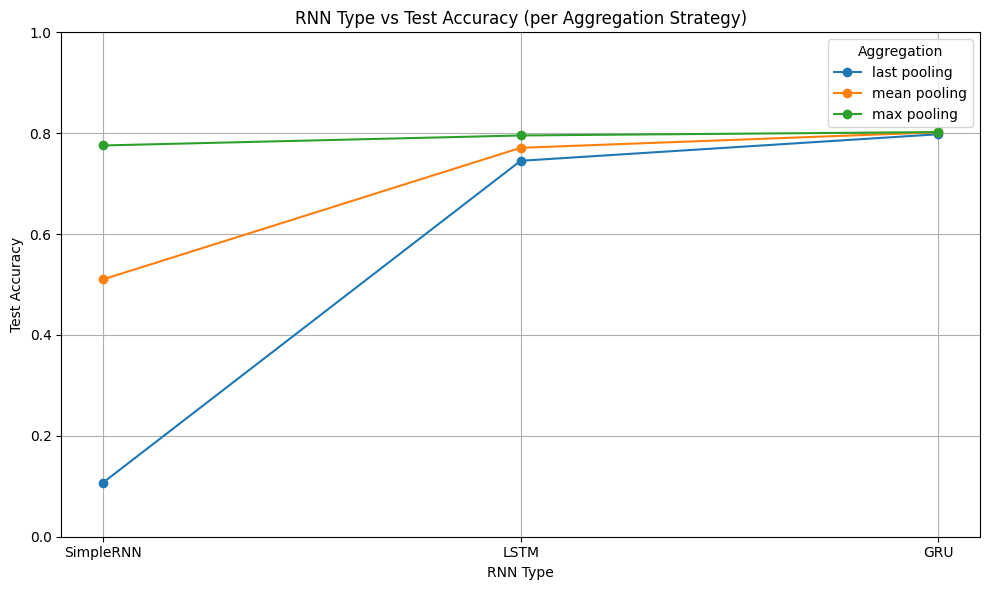

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot each aggregation strategy as a separate line
for agg in results_df_2['Aggregation'].unique():
    subset = results_df_2[results_df_2['Aggregation'] == agg]
    plt.plot(subset['RNN Type'], subset['Test Accuracy'], marker='o', label=f'{agg} pooling')

plt.title("RNN Type vs Test Accuracy (per Aggregation Strategy)")
plt.xlabel("RNN Type")
plt.ylabel("Test Accuracy")
plt.ylim(0, 1)
plt.legend(title="Aggregation")
plt.grid(True)
plt.tight_layout()
plt.show()
